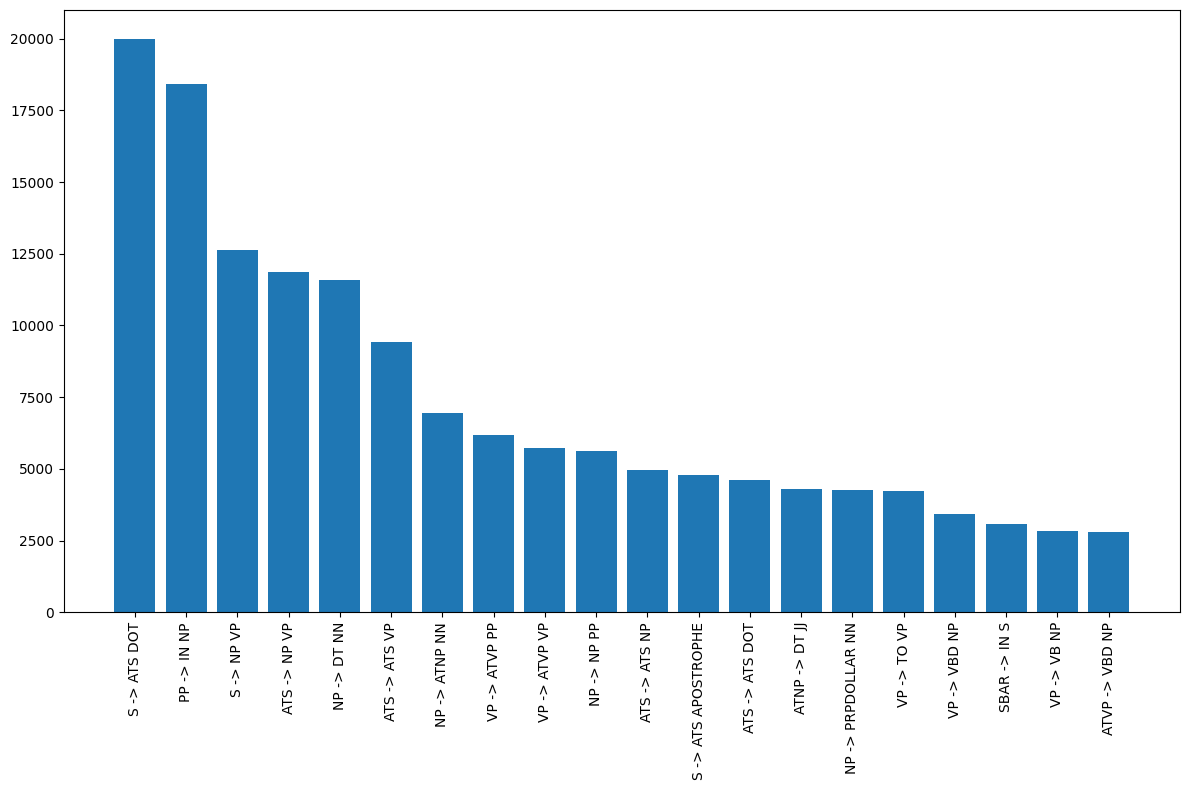

,Production Rule,Count
0,S -> ATS DOT,19997
25,PP -> IN NP,18411
39,S -> NP VP,12631
10,ATS -> NP VP,11848
9,NP -> DT NN,11568
...,...,...
1260,ATNP -> ATNP DOT,1
1258,NP -> PRPDOLLAR QP,1
1257,QP -> RB NNS,1
1256,ATFRAG -> TICK NP,1


In [3]:
import nltk
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

with open("lm_training/corpora_11mil__copy/test.nltk", "r", encoding="utf-8") as f:
    tree_strings = [line.strip() for line in f if line.strip()]
trees = [nltk.Tree.fromstring(s) for s in tree_strings]

rule_counter = Counter()
for tree in trees:
    for prod in tree.productions():
        # Skip productions that have a single symbol on the right-hand side.
        if len(prod.rhs()) == 1:
            continue
        cleaned_rule = re.sub(r'_\d+', '', str(prod))
        rule_counter[cleaned_rule] += 1

df = pd.DataFrame(rule_counter.items(), columns=['Production Rule', 'Count']).sort_values('Count', ascending=False)
df_top = df.head(20)

plt.figure(figsize=(12, 8))
plt.bar(df_top['Production Rule'], df_top['Count'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df


In [7]:
df[df["Count"] > 1000]

,Production Rule,Count
0,S -> ATS DOT,19997
25,PP -> IN NP,18411
39,S -> NP VP,12631
10,ATS -> NP VP,11848
9,NP -> DT NN,11568
1,ATS -> ATS VP,9419
43,NP -> ATNP NN,6960
12,VP -> ATVP PP,6183
4,VP -> ATVP VP,5726
28,NP -> NP PP,5626
